In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive


MyDrive  Shareddrives


In [3]:
a="/content/drive/MyDrive/MM_textData.xlsx"

In [4]:
import pandas as pd
df = pd.read_excel(a)
print(df.head())


  Participant                   Feedback
0          p1                It was easy
1          p1             I got confused
2          p1             I got confused
3          p1  I just guessed helplessly
4          p1                It was easy


In [5]:
import pandas as pd

# Define a function to count the number of words
def word_count(text):
    return len(text.split())

# Apply the function to the 'Feedback' column and store the result in a new column
df['Word_Count'] = df['Feedback'].apply(word_count)

# Display the first few rows
print(df.head())


  Participant                   Feedback  Word_Count
0          p1                It was easy           3
1          p1             I got confused           3
2          p1             I got confused           3
3          p1  I just guessed helplessly           4
4          p1                It was easy           3


In [6]:
df.info

<bound method DataFrame.info of     Participant                                   Feedback  Word_Count
0            p1                                It was easy           3
1            p1                             I got confused           3
2            p1                             I got confused           3
3            p1                  I just guessed helplessly           4
4            p1                                It was easy           3
..          ...                                        ...         ...
135         p28  I knew the answer because i saw the video           9
136         p28                    It was an easy question           5
137         p28                              i guesses it            3
138         p28          Got confused between both options           5
139         p28                  This was an easy question           5

[140 rows x 3 columns]>

In [7]:
print(df.isnull().sum())

Participant    0
Feedback       0
Word_Count     0
dtype: int64


In [8]:
df.describe()

,Word_Count
count,140.000000
mean,9.564286
std,7.261023
min,1.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,36.000000


In [9]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing to the 'Feedback' column
df['Preprocessed_Feedback'] = df['Feedback'].apply(preprocess_text)

# Display the first few rows
print(df.head())

  Participant                   Feedback  Word_Count Preprocessed_Feedback
0          p1                It was easy           3                  easy
1          p1             I got confused           3          got confused
2          p1             I got confused           3          got confused
3          p1  I just guessed helplessly           4    guessed helplessly
4          p1                It was easy           3                  easy


In [12]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [13]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 855.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=4bb6daf630ca263a5cedebc1d4f35bb9d4473fcf3de3a8ef4a511393826d1c11
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from afinn import Afinn

# Initialize the sentiment analyzers
vader_analyzer = SentimentIntensityAnalyzer()
afinn = Afinn()

# Function to get VADER sentiment
def vader_sentiment(text):
    return vader_analyzer.polarity_scores(text)['compound']

# Function to get Afinn sentiment
def afinn_sentiment(text):
    return afinn.score(text)

# Assuming the column you want to analyze is named 'Feedback'
# Change this if the column name is different
df['VADER_Sentiment'] = df['Feedback'].apply(vader_sentiment)  # Apply to the correct column
df['Afinn_Sentiment'] = df['Feedback'].apply(afinn_sentiment)  # Apply to the correct column

# Display the first few rows
print(df.head())

  Participant                   Feedback  Word_Count Preprocessed_Feedback  \
0          p1                It was easy           3                  easy   
1          p1             I got confused           3          got confused   
2          p1             I got confused           3          got confused   
3          p1  I just guessed helplessly           4    guessed helplessly   
4          p1                It was easy           3                  easy   

   VADER_Sentiment  Afinn_Sentiment  
0           0.4404              1.0  
1          -0.3182             -2.0  
2          -0.3182             -2.0  
3          -0.3400              0.0  
4           0.4404              1.0  


In [15]:
!pip install textstat
import textstat

# Function to get Flesch Reading Ease score
def readability_score(text):
    return textstat.flesch_reading_ease(text)

# Apply readability analysis to the 'Feedback' column
df['Readability_Score'] = df['Feedback'].apply(readability_score)

# Display the first few rows
print(df.head())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.7 MB/s eta 0:00:00
  Participant                   Feedback  Word_Count Preprocessed_Feedback  \
0          p1                It was easy           3                  easy   
1          p1             I got confused           3          got confused   
2          p1             I got confused           3          got confused   
3          p1  I just guessed helplessly           4    guessed helplessly   
4          p1                It was easy           3                  easy   

   VADER_Sentiment  Afinn_Sentiment  Readability_Score  
0           0.4404              1.0             119.19  
1          -0.3182             -2.0              93.81  
2          -0.3182             -2.0              93.81  
3          -0.3400              0.0              75.88  
4           0.4404              1.0             119.19  


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Assuming 'Feedback' is the original column with raw feedback
# Change this if the column with pre-cleaned text has a different name
feedback_column_name = 'Feedback'  # Replace with actual column name if different

# Fit and transform the feedback (replace 'Feedback' with the correct column name)
tfidf_matrix = tfidf_vectorizer.fit_transform(df[feedback_column_name])

# Get the feature names (keywords)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to get top keywords for each document
def get_top_keywords(row, feature_names, top_n=3):
    sorted_nzs = row.data.argsort()[::-1]
    top_keywords = [feature_names[idx] for idx in row.indices[sorted_nzs][:top_n]]
    return ', '.join(top_keywords)

# Apply the function to each row in the TF-IDF matrix
df['Top_Keywords'] = [get_top_keywords(row, feature_names) for row in tfidf_matrix]

# Display the first few rows
print(df.head())

  Participant                   Feedback  Word_Count Preprocessed_Feedback  \
0          p1                It was easy           3                  easy   
1          p1             I got confused           3          got confused   
2          p1             I got confused           3          got confused   
3          p1  I just guessed helplessly           4    guessed helplessly   
4          p1                It was easy           3                  easy   

   VADER_Sentiment  Afinn_Sentiment  Readability_Score  \
0           0.4404              1.0             119.19   
1          -0.3182             -2.0              93.81   
2          -0.3182             -2.0              93.81   
3          -0.3400              0.0              75.88   
4           0.4404              1.0             119.19   

                Top_Keywords  
0                       easy  
1              got, confused  
2              got, confused  
3  helplessly, guessed, just  
4                       eas

In [17]:
from collections import Counter

# Combine all feedback into one large string for each question
all_text = ' '.join([' '.join(df[col].astype(str)) for col in df.columns[1:]]) # Cast each Series to string type before joining

# Tokenize the combined text
tokens = word_tokenize(all_text)

# Get word frequency
word_freq = Counter(tokens)

# Display the most common words
print(word_freq.most_common(20))


[(',', 227), ('0.0', 133), ('answer', 109), ('question', 91), ('the', 76), ('was', 60), ('easy', 60), ('to', 55), ('this', 49), ('I', 43), ('.', 43), ('confused', 40), ('know', 34), ('option', 30), ('bit', 30), ('and', 28), ('i', 28), ('able', 25), ('time', 24), ('knew', 23)]


In [18]:
from textblob import TextBlob

# Function to get the sentiment
def get_sentiment(text):
    # Handle potential float or int values by converting to string
    if isinstance(text, (float, int)):  # Check for both float and int
        text = str(text)
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to each feedback column
for col in df.columns[1:]:
    df[col + '_sentiment'] = df[col].apply(get_sentiment)

# Display the first few rows with sentiment scores
print(df.head())

  Participant                   Feedback  Word_Count Preprocessed_Feedback  \
0          p1                It was easy           3                  easy   
1          p1             I got confused           3          got confused   
2          p1             I got confused           3          got confused   
3          p1  I just guessed helplessly           4    guessed helplessly   
4          p1                It was easy           3                  easy   

   VADER_Sentiment  Afinn_Sentiment  Readability_Score  \
0           0.4404              1.0             119.19   
1          -0.3182             -2.0              93.81   
2          -0.3182             -2.0              93.81   
3          -0.3400              0.0              75.88   
4           0.4404              1.0             119.19   

                Top_Keywords  Feedback_sentiment  Word_Count_sentiment  \
0                       easy            0.433333                   0.0   
1              got, confused      

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
# Adjust max_df to a value that makes sense for a single document
vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english')

# Join all text data into a single list of strings
all_text = [' '.join(df[col].astype(str)) for col in df.columns[1:]]

dtm = vectorizer.fit_transform(all_text)  # Fit and transform on the list of strings

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the topics
for index, topic in enumerate(lda.components_):
    print(f'TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

TOPIC #0
['got', 'time', 'able', 'bit', 'option', 'know', 'confused', 'easy', 'question', 'answer']
TOPIC #1
['3333333333333333', '37777777777777777', '146875', '23500000000000001', '375', '34', '25', '4333333333333333', '1875', '4666666666666667']
TOPIC #2
['17', '25', '20', '11', '15', '13', '12', '14', '10', '16']
TOPIC #3
['19', '81', '75', '92', '100', '91', '24', '74', '77', '88']
TOPIC #4
['11818181818181818', '2333333333333333', '21666666666666667', '296', '3182', '3333333333333333', '29375', '125', '4404', '43333333333333335']


In [20]:
 from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
# Adjust max_df to a value that makes sense for a single document
vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english')

# Join all text data into a single list of strings
all_text = [' '.join(df[col].astype(str)) for col in df.columns[1:]]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming df['Feedback'] contains the feedback text
vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(df['Feedback'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the topics
for index, topic in enumerate(lda.components_):
    print(f'TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


TOPIC #0
['answer', 'proficient', 'topic', 'little', 'similar', 'confusing', 'bit', 'options', 'question', 'easy']
TOPIC #1
['depth', 'language', 'able', 'knowledge', 'bit', 'time', 'got', 'answer', 'don', 'confused']
TOPIC #2
['attention', 'didn', 'option', 'related', 'understand', 'timer', 'continue', 'feedback', 'difficult', 'easy']
TOPIC #3
['idea', 'class', 'super', 'guess', 'import', 'random', 'guessed', 'just', 'didn', 'know']
TOPIC #4
['object', 'know', 'simple', 'good', 'option', 'able', 'wrong', 'knew', 'question', 'answer']


In [22]:
b='/content/drive/MyDrive/MM_MCData.xlsx'

In [23]:
import pandas as pd
df1 = pd.read_excel(b)
print(df1.head())

  Participant  Mcanswer  Score
0           p1        b      1
1           p1        d      0
2           p1        a      0
3           p1        d      1
4           p1        a      1


In [24]:
# Count of each answer choice
answer_counts = df1['Mcanswer'].value_counts()
print(answer_counts)

Mcanswer
a     41
b     34
d     32
c     28
Na     5
Name: count, dtype: int64


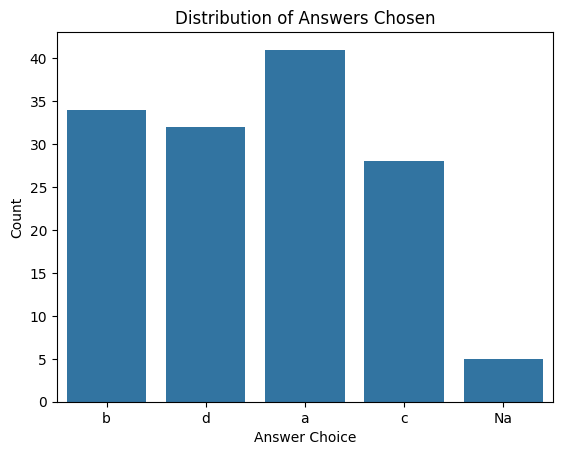

In [25]:
# Distribution of answers chosen
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Mcanswer', data=df1)
plt.title('Distribution of Answers Chosen')
plt.xlabel('Answer Choice')
plt.ylabel('Count')
plt.show()


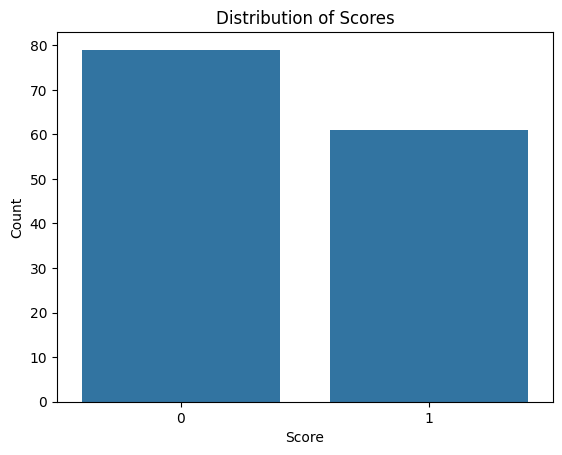

In [26]:
# Distribution of scores
sns.countplot(x='Score', data=df1)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


In [27]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

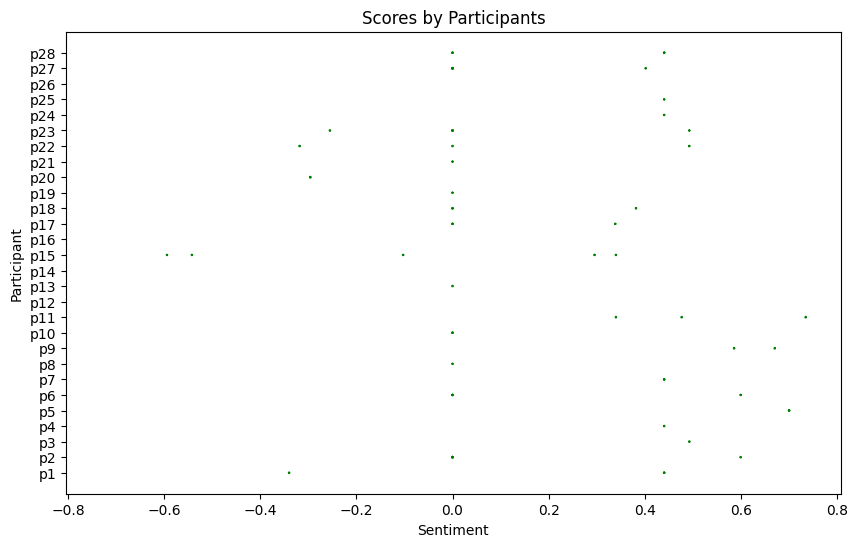

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df['VADER_Sentiment'],df['Participant'], df1['Score'], color='green', marker='*')
plt.xlabel("Sentiment")
plt.ylabel("Participant")
plt.title( 'Scores by Participants')
plt.show

Index(['Participant', 'Feedback', 'Word_Count', 'Preprocessed_Feedback',
       'VADER_Sentiment', 'Afinn_Sentiment', 'Readability_Score',
       'Top_Keywords', 'Feedback_sentiment', 'Word_Count_sentiment',
       'Preprocessed_Feedback_sentiment', 'VADER_Sentiment_sentiment',
       'Afinn_Sentiment_sentiment', 'Readability_Score_sentiment',
       'Top_Keywords_sentiment'],
      dtype='object')


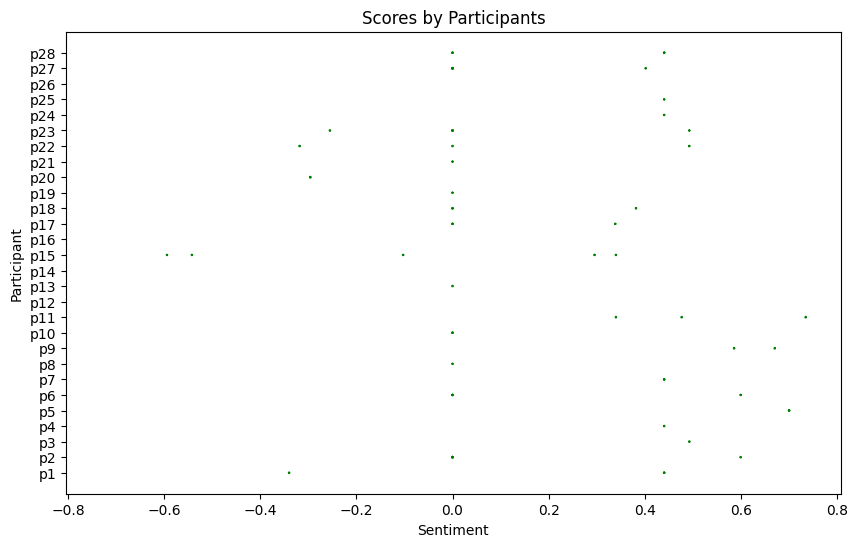

In [29]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

# Verify if 'VADER_Sentiment' exists in df.columns
print(df.columns)

plt.figure(figsize=(10,6))

# If 'VADER_Sentiment' exists, use it:
if 'VADER_Sentiment' in df.columns:
    plt.scatter(df['VADER_Sentiment'],df['Participant'], df1['Score'], color='green', marker='*')
# If not, replace with the correct column name or handle the missing column:
else:
    # Option 1: Replace with the actual column name if there's a typo
    # plt.scatter(df['ActualColumnName'], df['Participant'], df1['Score'], color='green', marker='*')

    # Option 2: Handle the missing column (e.g., skip plotting or fill with a default value)
    print("Column 'VADER_Sentiment' not found in DataFrame 'df'.")
    # ... handle the missing column ...

plt.xlabel("Sentiment")
plt.ylabel("Participant")
plt.title( 'Scores by Participants')
plt.show()

Accuracy based on sentiment analysis: 67.86%


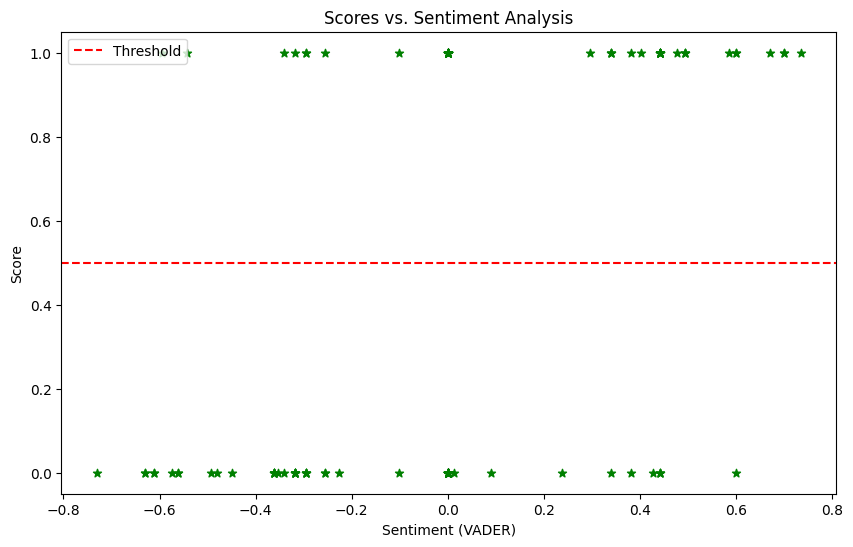

In [30]:
import matplotlib.pyplot as plt

# Assuming df contains sentiment data and df1 contains score data

# Map sentiment to scores based on VADER_Sentiment
df1['VADER_Predicted_Score'] = df['VADER_Sentiment'].apply(lambda x: 1 if x > 0 else 0) # Fixed the column name to 'VADER_Predicted_Score'

# Calculate accuracy
correct_predictions = (df1['VADER_Predicted_Score'] == df1['Score']).sum() # Use the corrected column name
total_predictions = len(df1)
accuracy = correct_predictions / total_predictions

print(f"Accuracy based on sentiment analysis: {accuracy:.2%}")

# Visualization (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(df['VADER_Sentiment'], df1['Score'], color='green', marker='*')
plt.xlabel("Sentiment (VADER)")
plt.ylabel("Score")
plt.title("Scores vs. Sentiment Analysis")
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains sentiment data and df1 contains score data

# Map sentiment to scores based on VADER_Sentiment
df1['VADER_Predicted_Score'] = df['VADER_Sentiment'].apply(lambda x: 1 if x > 0 else 0)

# Now you can print the predicted scores and actual scores
print(df1['VADER_Predicted_Score'], df1['Score'])

0      1
1      0
2      0
3      0
4      1
      ..
135    0
136    1
137    0
138    0
139    1
Name: VADER_Predicted_Score, Length: 140, dtype: int64 0      1
1      0
2      0
3      1
4      1
      ..
135    1
136    1
137    1
138    0
139    1
Name: Score, Length: 140, dtype: int64


In [32]:
c="/content/drive/MyDrive/combined data.xlsx"
import pandas as pd
df2 = pd.read_excel(c)
print(df2.head())


  Participant   Feedback_x Mcanswer  Score  Afinn_Sentiment_x  \
0          p1  It was easy        b      1                  1   
1          p1  It was easy        b      1                  1   
2          p1  It was easy        b      1                  1   
3          p1  It was easy        b      1                  1   
4          p1  It was easy        b      1                  1   

   VADER_Sentiment_x   Feedback_y  Afinn_Sentiment_y  VADER_Sentiment_y  \
0             0.4404  It was easy                  1             0.4404   
1             0.4404  It was easy                 -2            -0.3182   
2             0.4404  It was easy                 -2            -0.3182   
3             0.4404  It was easy                  0            -0.3400   
4             0.4404  It was easy                  1             0.4404   

                    Feedback  
0                It was easy  
1             I got confused  
2             I got confused  
3  I just guessed helplessly  
4  

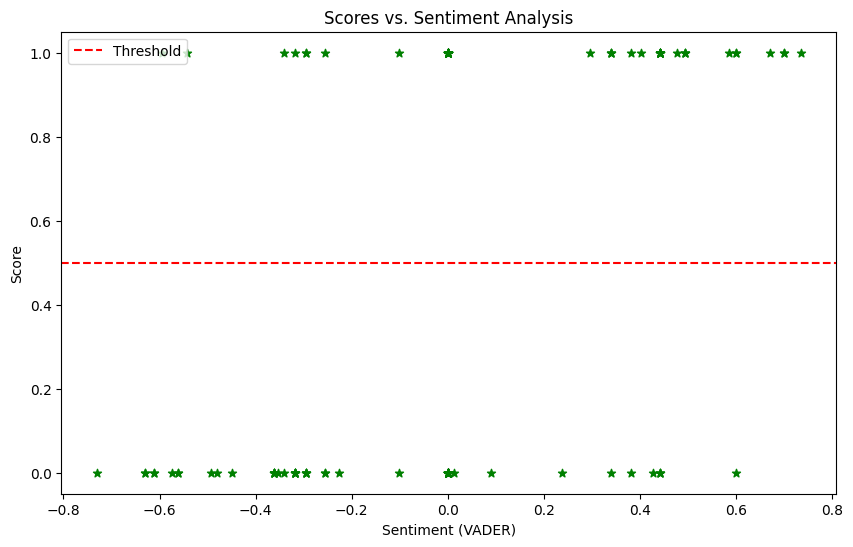

     Metric     Value
0  Accuracy  0.678571


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains sentiment data and df1 contains score data

# Map sentiment to scores based on VADER_Sentiment
df1['Predicted_Score using VADER'] = df['VADER_Sentiment'].apply(lambda x: 1 if x > 0 else 0)

# Calculate accuracy
# Use the correct column name 'Predicted_Score using VADER'
correct_predictions = (df1['Predicted_Score using VADER'] == df1['Score']).sum()
total_predictions = len(df1)
accuracy = correct_predictions / total_predictions

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Value': [accuracy]
})

# Visualization (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(df['VADER_Sentiment'], df1['Score'], color='green', marker='*')
plt.xlabel("Sentiment (VADER)")
plt.ylabel("Score")
plt.title("Scores vs. Sentiment Analysis")
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

print(results_df)

In [34]:
# Compare predicted score with actual score
df1['Match'] = df1['Predicted_Score using VADER'] == df1['Score']

# Calculate accuracy
correct_predictions = (df1['Predicted_Score using VADER'] == df1['Score']).sum()
total_predictions = len(df1)
accuracy = correct_predictions / total_predictions

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Value': [accuracy]
})

# Print comparison of predicted score with actual score
print(df1[['Score', 'Predicted_Score using VADER', 'Match']].head())

   Score  Predicted_Score using VADER  Match
0      1                            1   True
1      0                            0   True
2      0                            0   True
3      1                            0  False
4      1                            1   True


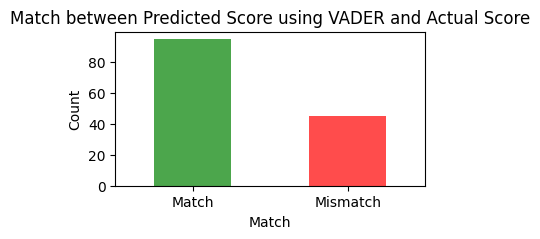

In [35]:
import matplotlib.pyplot as plt

# Assuming df1['Match'] is already calculated to compare Predicted_Score with Score

# Count the number of matches
match_counts = df1['Match'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(4, 2  ))
match_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.xlabel('Match')
plt.ylabel('Count')
plt.title('Match between Predicted Score using VADER and Actual Score')
plt.xticks([0, 1], ['Match', 'Mismatch'], rotation=0)
plt.show()


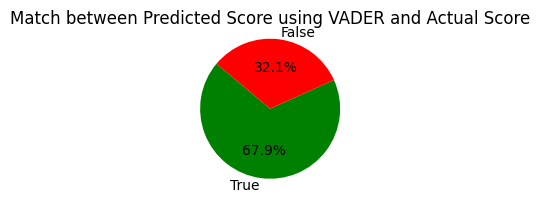

In [36]:
# Plotting the pie chart
plt.figure(figsize=(4, 2))
plt.pie(match_counts, labels=match_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=140)
plt.title('Match between Predicted Score using VADER and Actual Score')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



Accuracy based on sentiment analysis: 67.14%


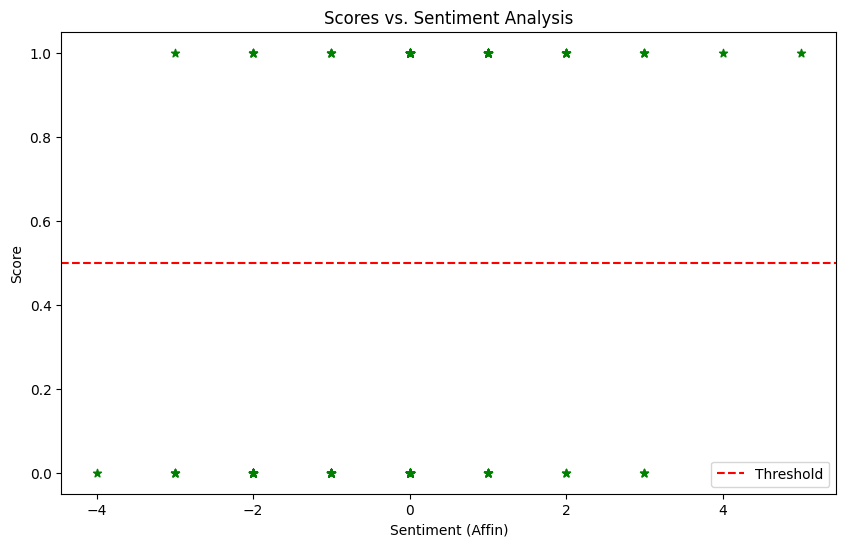

In [37]:
import matplotlib.pyplot as plt

# Assuming df contains sentiment data and df1 contains score data

# Map sentiment to scores based on VADER_Sentiment
df1['Predicted_Score using Afinn'] = df['Afinn_Sentiment'].apply(lambda x: 1 if x > 0 else 0)

# Calculate accuracy
correct_predictions = (df1['Predicted_Score using Afinn'] == df1['Score']).sum()
total_predictions = len(df1)
accuracy = correct_predictions / total_predictions

print(f"Accuracy based on sentiment analysis: {accuracy:.2%}")

# Visualization (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(df['Afinn_Sentiment'], df1['Score'], color='green', marker='*')
plt.xlabel("Sentiment (Affin)")
plt.ylabel("Score")
plt.title("Scores vs. Sentiment Analysis")
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()


In [38]:
# Compare predicted score with actual score
df1['Match'] = df1['Predicted_Score using Afinn'] == df1['Score']

# Calculate accuracy
correct_predictions = (df1['Predicted_Score using Afinn'] == df1['Score']).sum()
total_predictions = len(df1)
accuracy = correct_predictions / total_predictions

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Value': [accuracy]
})

# Print comparison of predicted score with actual score
print(df1[['Score', 'Predicted_Score using Afinn', 'Match']].head())

   Score  Predicted_Score using Afinn  Match
0      1                            1   True
1      0                            0   True
2      0                            0   True
3      1                            0  False
4      1                            1   True


    Participant                                   Feedback  Word_Count  \
0            p1                                It was easy           3   
1            p1                             I got confused           3   
2            p1                             I got confused           3   
3            p1                  I just guessed helplessly           4   
4            p1                                It was easy           3   
..          ...                                        ...         ...   
135         p28  I knew the answer because i saw the video           9   
136         p28                    It was an easy question           5   
137         p28                              i guesses it            3   
138         p28          Got confused between both options           5   
139         p28                  This was an easy question           5   

     Preprocessed_Feedback  VADER_Sentiment  Afinn_Sentiment  \
0                     easy           0.4404    

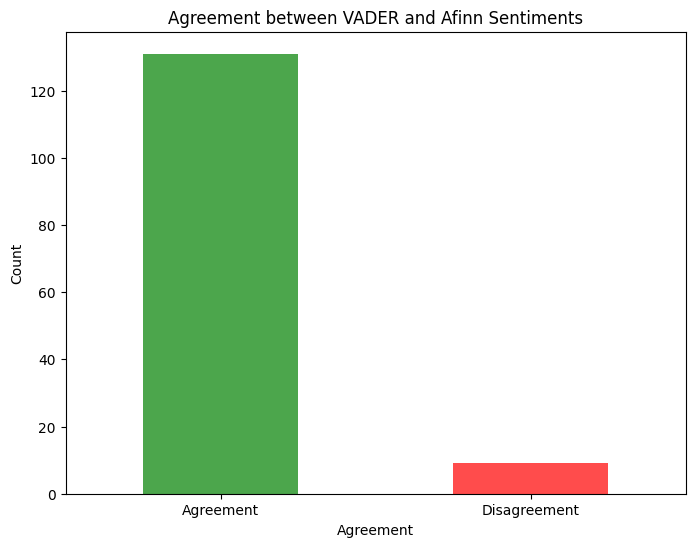

In [39]:
import pandas as pd

# Define function to classify sentiment as Positive, Negative, or Neutral
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification to both VADER and Afinn sentiments
df['VADER_Classification'] = df['VADER_Sentiment'].apply(classify_sentiment)
df['Afinn_Classification'] = df['Afinn_Sentiment'].apply(classify_sentiment)

# Compare classifications
df['Sentiment_Agreement'] = df['VADER_Classification'] == df['Afinn_Classification']

# Calculate the percentage of agreement
agreement_percentage = df['Sentiment_Agreement'].mean() * 100

# Display the DataFrame and agreement percentage
print(df)
print(f"Percentage of Agreement between VADER and Afinn Sentiments: {agreement_percentage:.2f}%")

# Visualize the agreement
import matplotlib.pyplot as plt

# Count the number of agreements and disagreements
agreement_counts = df['Sentiment_Agreement'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
agreement_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.xlabel('Agreement')
plt.ylabel('Count')
plt.title('Agreement between VADER and Afinn Sentiments')
plt.xticks([0, 1], ['Agreement', 'Disagreement'], rotation=0)
plt.show()


    Participant                                   Feedback  Word_Count  \
0            p1                                It was easy           3   
1            p1                             I got confused           3   
2            p1                             I got confused           3   
3            p1                  I just guessed helplessly           4   
4            p1                                It was easy           3   
..          ...                                        ...         ...   
135         p28  I knew the answer because i saw the video           9   
136         p28                    It was an easy question           5   
137         p28                              i guesses it            3   
138         p28          Got confused between both options           5   
139         p28                  This was an easy question           5   

     Preprocessed_Feedback  VADER_Sentiment  Afinn_Sentiment  \
0                     easy           0.4404    

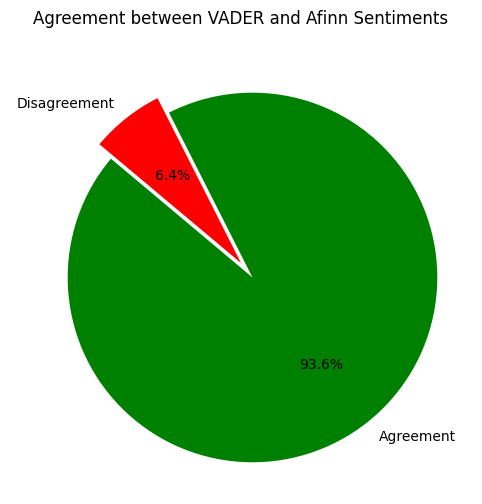

In [40]:
# Calculate the percentage of agreement and disagreement
total_comparisons = len(df)
agreement_count = df['Sentiment_Agreement'].sum()
disagreement_count = total_comparisons - agreement_count

agreement_percentage = (agreement_count / total_comparisons) * 100
disagreement_percentage = (disagreement_count / total_comparisons) * 100

# Display the results
print(df)
print(f"Percentage of Agreement between VADER and Afinn Sentiments: {agreement_percentage:.2f}%")
print(f"Percentage of Disagreement between VADER and Afinn Sentiments: {disagreement_percentage:.2f}%")

# Visualize the agreement
import matplotlib.pyplot as plt

# Count the number of agreements and disagreements
agreement_counts = df['Sentiment_Agreement'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
agreement_counts.plot(kind='pie', labels=['Agreement', 'Disagreement'], autopct='%1.1f%%', colors=['green', 'red'], startangle=140, explode=(0.1, 0))
plt.title('Agreement between VADER and Afinn Sentiments')
plt.ylabel('')
plt.show()

In [41]:
df1['VADER_Sentiment'] = df['VADER_Sentiment']

# Define the label function
def label_row(row):
    if row['VADER_Sentiment'] >= 0 and row['Score'] == 1:
        return "High"
    elif row['VADER_Sentiment'] >= 0 and row['Score'] == 0:
        return "Medium"
    elif row['VADER_Sentiment'] <= 0 and row['Score'] == 1:
        return "Medium"
    elif row['VADER_Sentiment'] <= 0 and row['Score'] == 0:
        return "Low"

# Apply the label function
df1['Label'] = df1.apply(label_row, axis=1)

# Display the resulting dataframe
print(df1)

    Participant  Mcanswer  Score  VADER_Predicted_Score  \
0             p1        b      1                      1   
1             p1        d      0                      0   
2             p1        a      0                      0   
3             p1        d      1                      0   
4             p1        a      1                      1   
..           ...      ...    ...                    ...   
135          p28        b      1                      0   
136          p28        c      1                      1   
137          p28        d      1                      0   
138          p28        c      0                      0   
139          p28        a      1                      1   

     Predicted_Score using VADER  Match  Predicted_Score using Afinn  \
0                              1   True                            1   
1                              0   True                            0   
2                              0   True                            0   
3  

In [42]:
# prompt: now i need to add all the  feedback column to the above dataframe

from google.colab import drive
import pandas as pd

# ... (Your existing code)

# Assuming 'df' is the DataFrame containing the 'Feedback' column
# and 'df1' is the DataFrame you want to add it to
df1['Feedback'] = df['Feedback']

# Display the updated DataFrame
print(df1)


    Participant  Mcanswer  Score  VADER_Predicted_Score  \
0             p1        b      1                      1   
1             p1        d      0                      0   
2             p1        a      0                      0   
3             p1        d      1                      0   
4             p1        a      1                      1   
..           ...      ...    ...                    ...   
135          p28        b      1                      0   
136          p28        c      1                      1   
137          p28        d      1                      0   
138          p28        c      0                      0   
139          p28        a      1                      1   

     Predicted_Score using VADER  Match  Predicted_Score using Afinn  \
0                              1   True                            1   
1                              0   True                            0   
2                              0   True                            0   
3  

In [43]:
df1.head()

,Participant,Mcanswer,Score,VADER_Predicted_Score,Predicted_Score using VADER,Match,Predicted_Score using Afinn,VADER_Sentiment,Label,Feedback
0,p1,b,1,1,1,True,1,0.4404,High,It was easy
1,p1,d,0,0,0,True,0,-0.3182,Low,I got confused
2,p1,a,0,0,0,True,0,-0.3182,Low,I got confused
3,p1,d,1,0,0,False,0,-0.3400,Medium,I just guessed helplessly
4,p1,a,1,1,1,True,1,0.4404,High,It was easy


In [44]:
df.head()

,Participant,Feedback,Word_Count,Preprocessed_Feedback,VADER_Sentiment,Afinn_Sentiment,Readability_Score,Top_Keywords,Feedback_sentiment,Word_Count_sentiment,Preprocessed_Feedback_sentiment,VADER_Sentiment_sentiment,Afinn_Sentiment_sentiment,Readability_Score_sentiment,Top_Keywords_sentiment,VADER_Classification,Afinn_Classification,Sentiment_Agreement
0,p1,It was easy,3,easy,0.4404,1.0,119.19,easy,0.433333,0.0,0.433333,0.0,0.0,0.0,0.433333,Positive,Positive,True
1,p1,I got confused,3,got confused,-0.3182,-2.0,93.81,"got, confused",-0.400000,0.0,-0.400000,0.0,0.0,0.0,-0.400000,Negative,Negative,True
2,p1,I got confused,3,got confused,-0.3182,-2.0,93.81,"got, confused",-0.400000,0.0,-0.400000,0.0,0.0,0.0,-0.400000,Negative,Negative,True
3,p1,I just guessed helplessly,4,guessed helplessly,-0.3400,0.0,75.88,"helplessly, guessed, just",0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,Negative,Neutral,False
4,p1,It was easy,3,easy,0.4404,1.0,119.19,easy,0.433333,0.0,0.433333,0.0,0.0,0.0,0.433333,Positive,Positive,True


In [45]:
# Reset index to include the Participant column in the merge
df_reset = df.reset_index(drop=True)
df1_reset = df1.reset_index(drop=True)

# Merge on the reset indexes
merged_df = pd.concat([df_reset, df1_reset], axis=1)

# Ensure the Participant column is only included once
merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]

print(merged_df)

    Participant                                   Feedback  Word_Count  \
0            p1                                It was easy           3   
1            p1                             I got confused           3   
2            p1                             I got confused           3   
3            p1                  I just guessed helplessly           4   
4            p1                                It was easy           3   
..          ...                                        ...         ...   
135         p28  I knew the answer because i saw the video           9   
136         p28                    It was an easy question           5   
137         p28                              i guesses it            3   
138         p28          Got confused between both options           5   
139         p28                  This was an easy question           5   

     Preprocessed_Feedback  VADER_Sentiment  Afinn_Sentiment  \
0                     easy           0.4404    

In [46]:
merged_df.head()

,Participant,Feedback,Word_Count,Preprocessed_Feedback,VADER_Sentiment,Afinn_Sentiment,Readability_Score,Top_Keywords,Feedback_sentiment,Word_Count_sentiment,...,Afinn_Classification,Sentiment_Agreement,Participant,Mcanswer,Score,VADER_Predicted_Score,Predicted_Score using VADER,Match,Predicted_Score using Afinn,Label
0,p1,It was easy,3,easy,0.4404,1.0,119.19,easy,0.433333,0.0,...,Positive,True,p1,b,1,1,1,True,1,High
1,p1,I got confused,3,got confused,-0.3182,-2.0,93.81,"got, confused",-0.400000,0.0,...,Negative,True,p1,d,0,0,0,True,0,Low
2,p1,I got confused,3,got confused,-0.3182,-2.0,93.81,"got, confused",-0.400000,0.0,...,Negative,True,p1,a,0,0,0,True,0,Low
3,p1,I just guessed helplessly,4,guessed helplessly,-0.3400,0.0,75.88,"helplessly, guessed, just",0.000000,0.0,...,Neutral,False,p1,d,1,0,0,False,0,Medium
4,p1,It was easy,3,easy,0.4404,1.0,119.19,easy,0.433333,0.0,...,Positive,True,p1,a,1,1,1,True,1,High


In [47]:
# Drop the specified columns
columns_to_drop = ['Word_Count_sentiment']
merged_df = merged_df.drop(columns=columns_to_drop)

In [48]:
merged_df

,Participant,Feedback,Word_Count,Preprocessed_Feedback,VADER_Sentiment,Afinn_Sentiment,Readability_Score,Top_Keywords,Feedback_sentiment,Preprocessed_Feedback_sentiment,...,Afinn_Classification,Sentiment_Agreement,Participant,Mcanswer,Score,VADER_Predicted_Score,Predicted_Score using VADER,Match,Predicted_Score using Afinn,Label
0,p1,It was easy,3,easy,0.4404,1.0,119.19,easy,0.433333,0.433333,...,Positive,True,p1,b,1,1,1,True,1,High
1,p1,I got confused,3,got confused,-0.3182,-2.0,93.81,"got, confused",-0.400000,-0.400000,...,Negative,True,p1,d,0,0,0,True,0,Low
2,p1,I got confused,3,got confused,-0.3182,-2.0,93.81,"got, confused",-0.400000,-0.400000,...,Negative,True,p1,a,0,0,0,True,0,Low
3,p1,I just guessed helplessly,4,guessed helplessly,-0.3400,0.0,75.88,"helplessly, guessed, just",0.000000,0.000000,...,Neutral,False,p1,d,1,0,0,False,0,Medium
4,p1,It was easy,3,easy,0.4404,1.0,119.19,easy,0.433333,0.433333,...,Positive,True,p1,a,1,1,1,True,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,p28,I knew the answer because i saw the video,9,knew answer saw video,0.0000,0.0,96.18,"saw, video, knew",0.000000,0.000000,...,Neutral,True,p28,b,1,0,0,False,0,High
136,p28,It was an easy question,5,easy question,0.4404,1.0,100.24,"easy, question",0.433333,0.433333,...,Positive,True,p28,c,1,1,1,True,1,High
137,p28,i guesses it,3,guess,0.0000,0.0,93.81,guesses,0.000000,0.000000,...,Neutral,True,p28,d,1,0,0,False,0,High
138,p28,Got confused between both options,5,got confused option,-0.3182,-2.0,66.40,"got, options, confused",-0.400000,-0.400000,...,Negative,True,p28,c,0,0,0,True,0,Low


In [49]:
# Save the DataFrame to an Excel file
output_file = "merged_data_with_feedback.xlsx"
merged_df.to_excel(output_file, index=False)

# Download the file to your local machine
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
data = '/content/drive/MyDrive/merged_data_with_feedback(1).xlsx'

In [51]:
import pandas as pd
data = pd.read_excel(data)
print(data.head())

  Participant                   Feedback  Word_Count Preprocessed_Feedback  \
0          p1                It was easy           3                  easy   
1          p1             I got confused           3          got confused   
2          p1             I got confused           3          got confused   
3          p1  I just guessed helplessly           4    guessed helplessly   
4          p1                It was easy           3                  easy   

   VADER_Sentiment  Afinn_Sentiment  Readability_Score  \
0           0.4404                1             119.19   
1          -0.3182               -2              93.81   
2          -0.3182               -2              93.81   
3          -0.3400                0              75.88   
4           0.4404                1             119.19   

                Top_Keywords  Feedback_sentiment  \
0                       easy            0.433333   
1              got, confused           -0.400000   
2              got, confus

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming 'data' is the DataFrame containing your data
# Select input features and output feature
X = data[['VADER_Sentiment', 'Afinn_Sentiment', 'Readability_Score', 'Feedback_sentiment', 'Preprocessed_Feedback_sentiment']]
y = data['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the scores on the test set
y_pred = clf.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.75
Precision: 0.86
Recall: 0.50
F1-Score: 0.63
Confusion Matrix:
[[15  1]
 [ 6  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.86      0.50      0.63        12

    accuracy                           0.75        28
   macro avg       0.79      0.72      0.72        28
weighted avg       0.78      0.75      0.73        28



In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming 'data' is the DataFrame containing your data
# Select input features and output feature
X = data[['VADER_Sentiment', 'Afinn_Sentiment', 'Readability_Score', 'Feedback_sentiment', 'Preprocessed_Feedback_sentiment']]
y = data['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# Predict the scores on the test set
y_pred = clf.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.75
Precision: 1.00
Recall: 0.42
F1-Score: 0.59
Confusion Matrix:
[[16  0]
 [ 7  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        16
           1       1.00      0.42      0.59        12

    accuracy                           0.75        28
   macro avg       0.85      0.71      0.70        28
weighted avg       0.83      0.75      0.72        28



In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is the DataFrame containing your data
# Select input features and output label
X = data[['VADER_Sentiment', 'Afinn_Sentiment', 'Readability_Score', 'Feedback_sentiment', 'Preprocessed_Feedback_sentiment']]
y = data['Clarity level']

# Encode the output label
y = y.map({'More Clarity': 0, 'Less Clarity': 1, 'No Clarity': 2})

# Drop rows with missing values in the target variable
# This step is crucial to address the NaN issue
data_cleaned = pd.concat([X, y], axis=1).dropna()
X = data_cleaned.drop('Clarity level', axis=1)
y = data_cleaned['Clarity level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
clf.fit(X_train, y_train)

# Predict the clarity levels on the test set
y_pred = clf.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1-Score: 0.85
Confusion Matrix:
[[11  0  0]
 [ 1  0  1]
 [ 0  0  6]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       0.00      0.00      0.00         2
         2.0       0.86      1.00      0.92         6

    accuracy                           0.89        19
   macro avg       0.59      0.67      0.63        19
weighted avg       0.80      0.89      0.85        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13